In [2]:
import mysql.connector as connection
import pandas as pd
import sys
sys.path.append('/Users/eavallon/Desktop/APA/shelterluv_cache/')
import sl_config
import matplotlib.pyplot as plt
import collections
import numpy as np

In [3]:
dbdw =connection.connect(host=sl_config.dbhost,user=sl_config.dbuser,passwd=sl_config.dbpassword,database='shelterluv')

In [4]:
date_query = """select DateDate as date
                from Dates
                where DateDate between '2019-01-00 00:00:00.0' and '2023-11-02 00:00:00.0'
                and (DateDate like '%-01 %'
                or DateDate like '%-15 %')"""

In [5]:
dates = pd.read_sql(date_query,dbdw)

In [6]:
q0 = f"""
    with onsite_status as (
        select stat.`AnimalInternal-ID`
        from AnimalsStatusHistory stat
        left join StatusTypes st on stat.AnimalStatus = st.AnimalStatus
        where st.Location = 'Shelter'
          and '{dates['date'][0]}' between DateStart and if(DateEnd is null, now(),DateEnd)),

        loc as (select loc.`AnimalInternal-ID`
        from AnimalsLocationHistory loc
        where loc.AnimalCurrentLocationTier1 = 'Dog'
          and loc.AnimalCurrentLocationTier2 = 'TLAC'
          and '{dates['date'][0]}' between DateStart and if(DateEnd is null, now(),DateEnd)),

        pink as (select acv.`AnimalInternal-ID`
        from AnimalsCategoryVolunteer acv
        where acv.CategoryVolunteer like 'Pink%'
        and '{dates['date'][0]}' between DateStart and if(DateEnd is null, now(),DateEnd)),

        orange as (select acv.`AnimalInternal-ID`
        from AnimalsCategoryVolunteer acv
        where acv.CategoryVolunteer like 'Orange%'
        and '{dates['date'][0]}' between DateStart and if(DateEnd is null, now(),DateEnd)),

        blue as (select acv.`AnimalInternal-ID`
        from AnimalsCategoryVolunteer acv
        where acv.CategoryVolunteer like 'Blue%'
        and '{dates['date'][0]}' between DateStart and if(DateEnd is null, now(),DateEnd)),

        silver as (select acv.`AnimalInternal-ID`
        from AnimalsCategoryVolunteer acv
        where acv.CategoryVolunteer like 'Silver%'
        and '{dates['date'][0]}' between DateStart and if(DateEnd is null, now(),DateEnd)),

        yellow as (select acv.`AnimalInternal-ID`
        from AnimalsCategoryVolunteer acv
        where acv.CategoryVolunteer like 'Yellow%'
        and '{dates['date'][0]}' between DateStart and if(DateEnd is null, now(),DateEnd)),

        red as (select acv.`AnimalInternal-ID`
        from AnimalsCategoryVolunteer acv
        where acv.CategoryVolunteer like 'Red%'
        and '{dates['date'][0]}' between DateStart and if(DateEnd is null, now(),DateEnd)),

        purple as (select acv.`AnimalInternal-ID`
        from AnimalsCategoryVolunteer acv
        where (acv.CategoryVolunteer like 'Purple%'
                or acv.CategoryVolunteer like 'AAC%')
                and '{dates['date'][0]}' between DateStart and if(DateEnd is null, now(),DateEnd)),

        nope as (select acv.`AnimalInternal-ID`
        from AnimalsCategoryVolunteer acv
        where (acv.CategoryVolunteer like 'None%'
                or acv.CategoryVolunteer is null)
        and '{dates['date'][0]}' between DateStart and if(DateEnd is null, now(),DateEnd))

        select '{dates['date'][0]}' as Date,
               count(pink.`AnimalInternal-ID`) as Pink,
               count(orange.`AnimalInternal-ID`) as Orange,
               count(blue.`AnimalInternal-ID`) as Blue,
               count(silver.`AnimalInternal-ID`) as Silver,
               count(yellow.`AnimalInternal-ID`) as Yellow,
               count(red.`AnimalInternal-ID`) as Red,
               count(purple.`AnimalInternal-ID`) as Purple,
               count(nope.`AnimalInternal-ID`) as None
        from Animals a
        left join onsite_status on a.`AnimalInternal-ID` = onsite_status.`AnimalInternal-ID`
        left join loc on a.`AnimalInternal-ID` = loc.`AnimalInternal-ID`
        left join pink on a.`AnimalInternal-ID` = pink.`AnimalInternal-ID`
        left join orange on a.`AnimalInternal-ID` = orange.`AnimalInternal-ID`
        left join blue on a.`AnimalInternal-ID` = blue.`AnimalInternal-ID`
        left join silver on a.`AnimalInternal-ID` = silver.`AnimalInternal-ID`
        left join yellow on a.`AnimalInternal-ID` = yellow.`AnimalInternal-ID`
        left join red on a.`AnimalInternal-ID` = red.`AnimalInternal-ID`
        left join purple on a.`AnimalInternal-ID` = purple.`AnimalInternal-ID`
        left join nope on a.`AnimalInternal-ID` = nope.`AnimalInternal-ID`
        where onsite_status.`AnimalInternal-ID` is not null
        and loc.`AnimalInternal-ID` is not null
        and a.DeletedFromSL is null;
        """

In [7]:
ccs = pd.read_sql(q0,dbdw)

In [8]:
ccs

,Date,Pink,Orange,Blue,Silver,Yellow,Red,Purple,None
0,2019-01-01 23:59:59,7,15,21,84,24,24,0,0


In [9]:
# Loop through the dates
for date in dates['date'][1:]:
    # Build and execute the query with the current date
    qi = f"""
        with onsite_status as (
        select stat.`AnimalInternal-ID`
        from AnimalsStatusHistory stat
        left join StatusTypes st on stat.AnimalStatus = st.AnimalStatus
        where st.Location = 'Shelter'
          and '{date}' between DateStart and if(DateEnd is null, now(),DateEnd)),

        loc as (select loc.`AnimalInternal-ID`
        from AnimalsLocationHistory loc
        where loc.AnimalCurrentLocationTier1 = 'Dog'
          and loc.AnimalCurrentLocationTier2 = 'TLAC'
          and '{date}' between DateStart and if(DateEnd is null, now(),DateEnd)),

        pink as (select acv.`AnimalInternal-ID`
        from AnimalsCategoryVolunteer acv
        where acv.CategoryVolunteer like 'Pink%'
        and '{date}' between DateStart and if(DateEnd is null, now(),DateEnd)),

        orange as (select acv.`AnimalInternal-ID`
        from AnimalsCategoryVolunteer acv
        where acv.CategoryVolunteer like 'Orange%'
        and '{date}' between DateStart and if(DateEnd is null, now(),DateEnd)),

        blue as (select acv.`AnimalInternal-ID`
        from AnimalsCategoryVolunteer acv
        where acv.CategoryVolunteer like 'Blue%'
        and '{date}' between DateStart and if(DateEnd is null, now(),DateEnd)),

        silver as (select acv.`AnimalInternal-ID`
        from AnimalsCategoryVolunteer acv
        where acv.CategoryVolunteer like 'Silver%'
        and '{date}' between DateStart and if(DateEnd is null, now(),DateEnd)),

        yellow as (select acv.`AnimalInternal-ID`
        from AnimalsCategoryVolunteer acv
        where acv.CategoryVolunteer like 'Yellow%'
        and '{date}' between DateStart and if(DateEnd is null, now(),DateEnd)),

        red as (select acv.`AnimalInternal-ID`
        from AnimalsCategoryVolunteer acv
        where acv.CategoryVolunteer like 'Red%'
        and '{date}' between DateStart and if(DateEnd is null, now(),DateEnd)),

        purple as (select acv.`AnimalInternal-ID`
        from AnimalsCategoryVolunteer acv
        where (acv.CategoryVolunteer like 'Purple%'
                or acv.CategoryVolunteer like 'AAC%')
        and '{date}' between DateStart and if(DateEnd is null, now(),DateEnd)),

        nope as (select acv.`AnimalInternal-ID`
        from AnimalsCategoryVolunteer acv
        where (acv.CategoryVolunteer like 'None%'
                or acv.CategoryVolunteer is null)
        and '{date}' between DateStart and if(DateEnd is null, now(),DateEnd))

        select '{date}' as Date,
               count(pink.`AnimalInternal-ID`) as Pink,
               count(orange.`AnimalInternal-ID`) as Orange,
               count(blue.`AnimalInternal-ID`) as Blue,
               count(silver.`AnimalInternal-ID`) as Silver,
               count(yellow.`AnimalInternal-ID`) as Yellow,
               count(red.`AnimalInternal-ID`) as Red,
               count(purple.`AnimalInternal-ID`) as Purple,
               count(nope.`AnimalInternal-ID`) as None
        from Animals a
        left join onsite_status on a.`AnimalInternal-ID` = onsite_status.`AnimalInternal-ID`
        left join loc on a.`AnimalInternal-ID` = loc.`AnimalInternal-ID`
        left join pink on a.`AnimalInternal-ID` = pink.`AnimalInternal-ID`
        left join orange on a.`AnimalInternal-ID` = orange.`AnimalInternal-ID`
        left join blue on a.`AnimalInternal-ID` = blue.`AnimalInternal-ID`
        left join silver on a.`AnimalInternal-ID` = silver.`AnimalInternal-ID`
        left join yellow on a.`AnimalInternal-ID` = yellow.`AnimalInternal-ID`
        left join red on a.`AnimalInternal-ID` = red.`AnimalInternal-ID`
        left join purple on a.`AnimalInternal-ID` = purple.`AnimalInternal-ID`
        left join nope on a.`AnimalInternal-ID` = nope.`AnimalInternal-ID`
        where onsite_status.`AnimalInternal-ID` is not null
        and loc.`AnimalInternal-ID` is not null
        and a.DeletedFromSL is null;
        """

    ccs_i = pd.read_sql(qi,dbdw)
    ccs = ccs.append(ccs_i,ignore_index=True)
    print(date)

2019-01-15 23:59:59
2019-02-01 23:59:59
2019-02-15 23:59:59
2019-03-01 23:59:59
2019-03-15 23:59:59
2019-04-01 23:59:59
2019-04-15 23:59:59
2019-05-01 23:59:59
2019-05-15 23:59:59
2019-06-01 23:59:59
2019-06-15 23:59:59
2019-07-01 23:59:59
2019-07-15 23:59:59
2019-08-01 23:59:59
2019-08-15 23:59:59
2019-09-01 23:59:59
2019-09-15 23:59:59
2019-10-01 23:59:59
2019-10-15 23:59:59
2019-11-01 23:59:59
2019-11-15 23:59:59
2019-12-01 23:59:59
2019-12-15 23:59:59
2020-01-01 23:59:59
2020-01-15 23:59:59
2020-02-01 23:59:59
2020-02-15 23:59:59
2020-03-01 23:59:59
2020-03-15 23:59:59
2020-04-01 23:59:59
2020-04-15 23:59:59
2020-05-01 23:59:59
2020-05-15 23:59:59
2020-06-01 23:59:59
2020-06-15 23:59:59
2020-07-01 23:59:59
2020-07-15 23:59:59
2020-08-01 23:59:59
2020-08-15 23:59:59
2020-09-01 23:59:59
2020-09-15 23:59:59
2020-10-01 23:59:59
2020-10-15 23:59:59
2020-11-01 23:59:59
2020-11-15 23:59:59
2020-12-01 23:59:59
2020-12-15 23:59:59
2021-01-01 23:59:59
2021-01-15 23:59:59
2021-02-01 23:59:59


In [10]:
ccs.to_csv('/Users/eavallon/Desktop/APA/APA_AnalysisTrials/CollarColorTrend.csv',index=False)

In [11]:
ccs

,Date,Pink,Orange,Blue,Silver,Yellow,Red,Purple,None
0,2019-01-01 23:59:59,7,15,21,84,24,24,0,0
1,2019-01-15 23:59:59,8,15,24,80,22,21,0,0
2,2019-02-01 23:59:59,6,15,24,68,24,18,0,0
3,2019-02-15 23:59:59,10,19,35,72,23,17,0,0
4,2019-03-01 23:59:59,15,23,39,68,21,16,0,0
...,...,...,...,...,...,...,...,...,...
112,2023-09-01 23:59:59,2,4,26,64,43,15,5,13
113,2023-09-15 23:59:59,4,7,24,56,52,17,5,13
114,2023-10-01 23:59:59,6,7,23,60,44,19,5,14
115,2023-10-15 23:59:59,5,9,14,56,56,16,8,14


In [27]:
cct = pd.read_csv('/Users/eavallon/Desktop/APA/APA_AnalysisTrials/CollarColorTrend.csv')

In [31]:
totalpop = cct.transpose().drop(['Date']).sum()

In [29]:
totalpop.index = cct['Date']

In [38]:
cct['TotalPop'] = totalpop.values

In [40]:
cct.keys()[1:-1]

Index(['Pink', 'Orange', 'Blue', 'Silver', 'Yellow', 'Red', 'Purple', 'None'], dtype='object')

In [44]:
cct['Pink']/cct['TotalPop']

0     0.040000
1     0.038710
2     0.082418
3     0.053254
4     0.054348
5     0.049451
6     0.025157
7     0.032258
8     0.072222
9     0.063158
10    0.035294
11    0.060440
12    0.070175
13    0.074713
14    0.084337
15    0.061728
16    0.219780
17    0.101449
18    0.050000
19    0.086420
20    0.144444
21    0.098901
22    0.112150
23    0.076923
24    0.029197
25    0.041237
26    0.096386
27    0.047619
28    0.083969
29    0.053030
30    0.083969
31    0.063380
32    0.091463
33    0.051724
34    0.039062
35    0.050000
36    0.055172
37    0.025974
38    0.100000
39    0.043860
40    0.083969
41    0.040650
42    0.079365
43    0.016000
44    0.047619
45    0.032520
46    0.000000
47    0.043165
48    0.023256
49    0.010204
50    0.080645
51    0.068182
52    0.021898
53    0.045113
54    0.065359
55    0.033784
56    0.012579
57    0.036364
58    0.034884
dtype: float64

In [41]:
plot_color = {'Pink':'xkcd:pink','Orange':'xkcd:orange','Blue':'xkcd:blue','Silver':'xkcd:silver',
              'Yellow':'xkcd:gold','Red':'xkcd:red','Purple':'xkcd:purple','None':'xkcd:black'}

In [58]:
yi = np.zeros(len(cct))

In [59]:
yi

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])

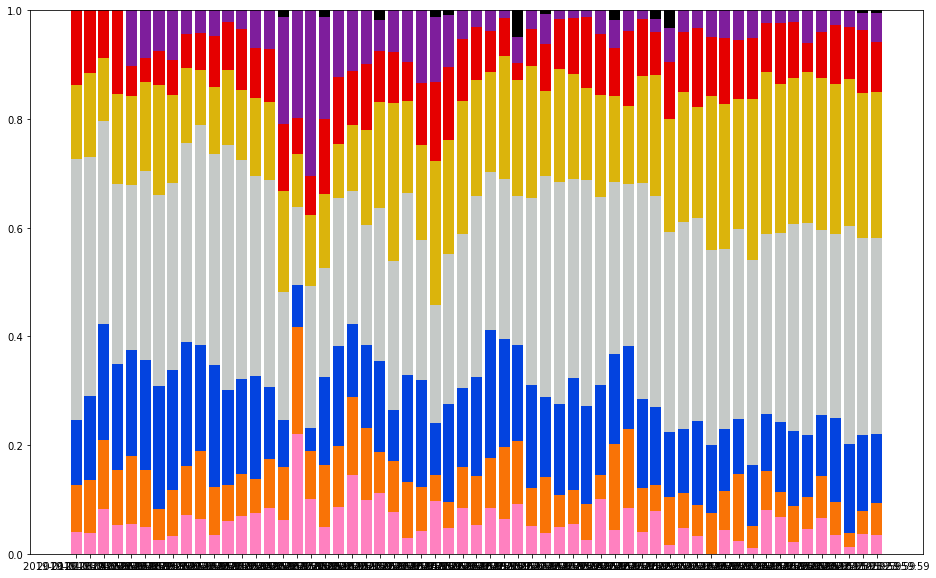

In [63]:
fig,ax = plt.subplots(figsize=(16,10))

yi = np.zeros(len(cct))

for color in cct.keys()[1:-1]:
    ax.bar(cct['Date'], cct[color]/cct['TotalPop'], label=color, bottom=yi, color=plot_color[color])
    yi += cct[color]/cct['TotalPop']

# ax.set_title("Number of penguins with above average body mass")
# ax.legend(loc="upper right")

# plt.bar(ccs['Date'],ccs['Pink'],color='red',edgecolor='black')

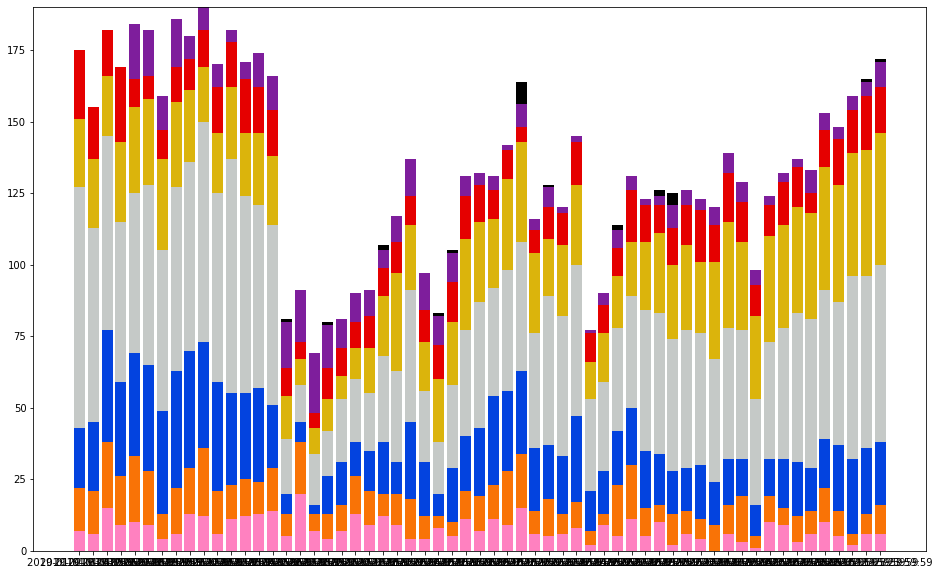

In [69]:
fig,ax = plt.subplots(figsize=(16,10))

yi0 = np.zeros(len(cct))

for color in cct.keys()[1:-1]:
    ax.bar(cct['Date'], cct[color], label=color, bottom=yi0, color=plot_color[color])
    yi0 += cct[color]

# ax.set_title("Number of penguins with above average body mass")
# ax.legend(loc="upper right")

# plt.bar(ccs['Date'],ccs['Pink'],color='red',edgecolor='black')

In [67]:
 cct.keys()[1:-1]

Index(['Pink', 'Orange', 'Blue', 'Silver', 'Yellow', 'Red', 'Purple', 'None'], dtype='object')